# <h1><center> Laboratorio di WebScraping </h1>
<h1><center> Anno Accademico 2023-2024 </h1>
<h1><center>  Docente: Laura Ricci </h1>
<h1><center>  Lezione 13 </h1>
<h1><center>  Representing Data Relationship with Graphs: Networkx</h1>  
<h1><center> 22 Marzo 2024 </h1>

## Graphs e Networks: introduzione

* several dataset contains entities connected by some relationship
* how to represent these relationships? Grahs, Networks,...

<center>
<img src="Figures/Network.jpg" style="width:300px;height:200px;"/>
</center>

* Network $\equiv$ Graph? 
    * generally, the two term are used in the same way, but...

* **Network** **<nodes, links>** refers to real systems
    * (www, social network, metabolic network)

* **Graph** **<vertices, edges>**
    * mathematical representation of a network
    * web graph, social graph



## Graphs e Networks: introduzione

<center>
<img src="Figures/TableNetwork.jpg" style="width:1000px;height:700px;"/>
<center\>

## My Linkedin Network

<center>
<img src="Figures/Linkedin.jpg" style="width:800px;height:800px;"/>
</center>

## Complex networks: Bitcoin's user graph (2013)

<center>
<img src="Figures/Bitcoin.jpg" style="width:1100px;height:800px;"/>
</center>

## Complex Networks: the Bitcoin Lightning Network (2018)

<center>
<img src="Figures/Lightning.jpg" style="width:1000px;height:800px;"/>
</center>

## Complex Network Science

* a discipline which has recently received a lot of attention

* to study a complex system by exploring the structure and dynamics of the underlying network
    * applied in different fields: economy, biology and many basic sciences
    * approached from different perspectives:
        * theoretical
        * experimental: it is possible, due to recent availability of huge datasets

* two different aspects
    * structure: the “shape” of the network
    * dynamics: how the shape changes over time and how information is propagated on the network

## Complex Network 

* complex networks include millions of nodes 
* “classic graph analysis” targeted to networks of small dimension is no more useful
* some examples:
    * an interesting property for a small dimension network: “does it exist a vertex which is indispensable to maintain the network connectivity?”
    * an interesting property for a complex network: “which is the percentage of nodes which are to be removed to modify the network connectivity at some degree”?
* proper models for these networks should be defined to describe the properties of the topology
* the analysis of complex networks often requires tools based on the statistical analysis of the network properties

## Complex Network 

* what are the main properties characterizing a complex network ?
    * average length of paths
    * clustering
    * distribution of nodes degrees
    * network resilience
    * giant component formation
    * centrality measures: are there vertexes which are more important than others?

* what mathematical model is able to describe and generate networks having fixed characteristics?
    * for instance low diameter and high clustering coefficient, such as social networks: **small words**
    * new models recently proposed which are more suitable for describing social and P2P networks

## NetworkX: a Python Library for graph analysis

* *Python package for the creation, manipulation and study of the structure, dynamics and functions of complex networks.”*

* data structures for representing many types of networks through graphs
* fully integrated in **Python**
    * nodes can be any (hashable) Python object
    * edges are tuples with optional edge data (stored in dictionaries)
* flexibility ideal for representing networks found in many different fields
* easy to install on multiple platforms
* online up-to-date documentation
* first public release in April 2005, continous development

## Why should I USE NetworkX?

* unlike many other tools, it is designed to handle data on a scale relevant to a good set of modern problems
    * but not all
    * may be not useful for representing huge transaction graph for blockchain
* most of the core algorithms rely on extremely fast legacy code
* highly flexible graph implementations (a graph/node can be anything!)
* extensive set of native readable and writable formats
* takes advantage of Python’s ability to pull data from the Internet or databases



## NetworkX: why should I AVOID NetworkX?

* large-scale problems that require faster approaches (i.e. massive networks with 100M/1T edges)
* better use of memory/threads than Python (large objects, parallel computation)
    * parallel frameworks
    * **SPARKS**

## NetworkX: computing shortest and weighted shortest path

* let us consider the graph below, where the size of the arcs correspond to their weight
* compute the shortest path and the weighted shortest path

<img src="Figures/ShortestPathExample.jpg" scale=0.2/>

In [4]:
import networkx as nx
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
g = nx.Graph()
g.add_edge('a','b',weight=0.1)
g.add_edge('b','c',weight=1.5)
g.add_edge('a','c',weight=1.0)
g.add_edge('c','d',weight=2.2)
print (nx.shortest_path(g,'b','d'))
print (nx.shortest_path(g,'b','d',weight='weight'))


['b', 'c', 'd']
['b', 'a', 'c', 'd']


## NetworkX: tipi di grafo

<center>
<img src="Figures/TypeOfGraphs.jpg" style="width:1200px;height:400px;"/>
</center>

* ad ogni grafo corrisponde una classe di **NetworkX**
    * **Graph** grafi non orientati semplici (possibili self loops)
    * **DiGraph** grafi orientati (diretti) semplici (possibili self loops)
    * **MultiGraph** grafi non orientati in cui possono essere presenti più archi tra due nodi  (possibili self loops)
    * **MultiDiGraph**  grafi orientati in cui possono essere presenti più archi tra due nodi  (possibili self loops)
* contiene inoltre una serie di funzioni per la generazione do grafi con certe caratteristiche

## NetworkX: generazione sintetica di grafi

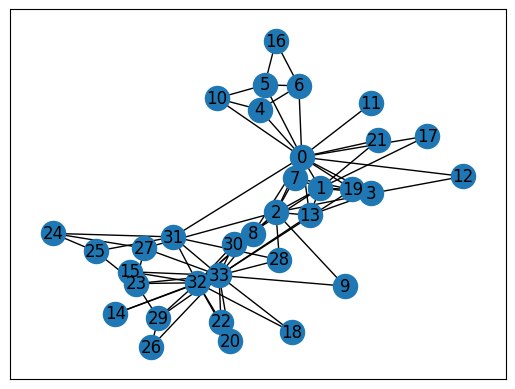

In [5]:
kn=nx.karate_club_graph()
nx.draw_networkx(kn)


* Zachary's karate club descrive le relazioni tra i membri di un classe di karate fuori dalla classe
* importante perchè un primo esempio **storico** di social network: 2002
* documenta come un conflitto tra l'istruttore del corso e il presidente del corso porta alla divisione della rete in due sottoreti



## NetworkX: data representation

* in NetworkX esiste un oggetto **Graph** che memorizza le informazioni in **dizionari Python**
* **Graph.node** è un attributo della classe che memorizza i nodi del grafo
    * è un dictionary in cui la chiave è il **Node ID** e il valore è un altro dizionario con gli attributi di quel nodo
    * il secondo dizionario ha per chiave il **nome** dell'attributo e per **valore** il valore dell'attributo 
* **Graph.edge** è un attributo della classe che memorizza gli archi del grafo
    * è un **nested dictionary**, acceduto dando i due estremi dell'arco
    * ad ogni arco viene associato un dizionario che riporta gli attributi dell'arco
* ogni oggetto **hashable** può essere un nodo, ad esempio liste e tuple, ma non liste o sets


## NetworkX: data representation

In [6]:
import networkx as nx
import random
grafo_non_orientato = nx.Graph()
for x in range(0, 20):
    ranage=random.randint(1, 100)
    ransex=random.randint(0,1)
    if ransex==0:
       sex="Male"
    else: 
       sex="Female"
    grafo_non_orientato.add_node(x, sex=sex, age=ranage)

print(grafo_non_orientato.nodes)
print(len(grafo_non_orientato.nodes()))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
20


In [2]:
grafo_non_orientato.nodes(data=True)


NodeDataView({0: {'sex': 'Female', 'age': 13}, 1: {'sex': 'Female', 'age': 42}, 2: {'sex': 'Male', 'age': 5}, 3: {'sex': 'Female', 'age': 67}, 4: {'sex': 'Female', 'age': 65}, 5: {'sex': 'Female', 'age': 82}, 6: {'sex': 'Female', 'age': 66}, 7: {'sex': 'Female', 'age': 37}, 8: {'sex': 'Female', 'age': 23}, 9: {'sex': 'Male', 'age': 4}, 10: {'sex': 'Female', 'age': 56}, 11: {'sex': 'Female', 'age': 65}, 12: {'sex': 'Female', 'age': 71}, 13: {'sex': 'Female', 'age': 58}, 14: {'sex': 'Male', 'age': 40}, 15: {'sex': 'Female', 'age': 87}, 16: {'sex': 'Female', 'age': 42}, 17: {'sex': 'Female', 'age': 93}, 18: {'sex': 'Male', 'age': 14}, 19: {'sex': 'Male', 'age': 7}})

## Attributi di un nodo: accesso e modifica

In [3]:
grafo_non_orientato.nodes[3]


{'sex': 'Female', 'age': 67}

In [4]:
grafo_non_orientato.nodes[3]['sex']


'Female'

* modifica o inserimento di un nuovo attributo per un nodo già inserito
* utilizzando l'attributo **nodes** dell'oggetto **Graph**
* accesso per chiave ad un dizionario


In [5]:
grafo_non_orientato.nodes[3]['sex'] = 'Male'
grafo_non_orientato.nodes(data=True)


NodeDataView({0: {'sex': 'Female', 'age': 13}, 1: {'sex': 'Female', 'age': 42}, 2: {'sex': 'Male', 'age': 5}, 3: {'sex': 'Male', 'age': 67}, 4: {'sex': 'Female', 'age': 65}, 5: {'sex': 'Female', 'age': 82}, 6: {'sex': 'Female', 'age': 66}, 7: {'sex': 'Female', 'age': 37}, 8: {'sex': 'Female', 'age': 23}, 9: {'sex': 'Male', 'age': 4}, 10: {'sex': 'Female', 'age': 56}, 11: {'sex': 'Female', 'age': 65}, 12: {'sex': 'Female', 'age': 71}, 13: {'sex': 'Female', 'age': 58}, 14: {'sex': 'Male', 'age': 40}, 15: {'sex': 'Female', 'age': 87}, 16: {'sex': 'Female', 'age': 42}, 17: {'sex': 'Female', 'age': 93}, 18: {'sex': 'Male', 'age': 14}, 19: {'sex': 'Male', 'age': 7}})

## Aggiungere gli archi

In [7]:
for x in range(0, 40):
    while True:
        node1=random.randint(0,20)
        node2=random.randint(0,20)
        if node1!= node2:
           break
    grafo_non_orientato.add_edge(node1,node2)
grafo_non_orientato.edges(data=True)


EdgeDataView([(0, 1, {}), (0, 15, {}), (0, 10, {}), (1, 8, {}), (1, 10, {}), (2, 4, {}), (2, 3, {}), (2, 12, {}), (3, 16, {}), (3, 9, {}), (4, 17, {}), (4, 19, {}), (4, 5, {}), (4, 12, {}), (5, 14, {}), (5, 13, {}), (5, 12, {}), (5, 7, {}), (6, 19, {}), (7, 15, {}), (8, 15, {}), (8, 17, {}), (9, 18, {}), (9, 11, {}), (9, 16, {}), (10, 16, {}), (10, 13, {}), (10, 12, {}), (11, 12, {}), (11, 15, {}), (12, 19, {}), (12, 14, {}), (13, 17, {}), (14, 18, {}), (17, 19, {})])

In [8]:
len(grafo_non_orientato.edges())


35

* ogni edge è una tupla che riporta gli estremi dell'arco e il dizionario che descrive gli attributi

## Aggiungere Attributi agli archi

In [9]:
import datetime
d=datetime.datetime.now()
nx.set_edge_attributes(grafo_non_orientato, 0, 'Interaction_number')

grafo_non_orientato.edges(data=True)


EdgeDataView([(0, 1, {'Interaction_number': 0}), (0, 15, {'Interaction_number': 0}), (0, 10, {'Interaction_number': 0}), (1, 8, {'Interaction_number': 0}), (1, 10, {'Interaction_number': 0}), (2, 4, {'Interaction_number': 0}), (2, 3, {'Interaction_number': 0}), (2, 12, {'Interaction_number': 0}), (3, 16, {'Interaction_number': 0}), (3, 9, {'Interaction_number': 0}), (4, 17, {'Interaction_number': 0}), (4, 19, {'Interaction_number': 0}), (4, 5, {'Interaction_number': 0}), (4, 12, {'Interaction_number': 0}), (5, 14, {'Interaction_number': 0}), (5, 13, {'Interaction_number': 0}), (5, 12, {'Interaction_number': 0}), (5, 7, {'Interaction_number': 0}), (6, 19, {'Interaction_number': 0}), (7, 15, {'Interaction_number': 0}), (8, 15, {'Interaction_number': 0}), (8, 17, {'Interaction_number': 0}), (9, 18, {'Interaction_number': 0}), (9, 11, {'Interaction_number': 0}), (9, 16, {'Interaction_number': 0}), (10, 16, {'Interaction_number': 0}), (10, 13, {'Interaction_number': 0}), (10, 12, {'Interact

* per ogni arco un dizionario che riporta gli attributi di quell'arco

##  Rimozione archi e nodi

* per rimuovere gli archi e i nodi posso applicare i seguenti metodi:
    * *remove_node()*
    * *remove_nodes_from()*
    * *remove_edge()*
    * *remove_edges_from()*

che rappresentano la controparte dei metodi di inserimento visti in precedenza.

* per cancellare tutti gli elementi si invoca il metodo __clear()__

## Visualizzare un grafo


* NetworkX fornisce dei metodi per visualizzare i grafi, tuttavia la visualizzazione è piuttosto semplice e limitata, utilizzando il metodo **draw()**
* per questo motivo è meglio utilizzare strumenti per la visualizzazione dei grafi, quali Gephi


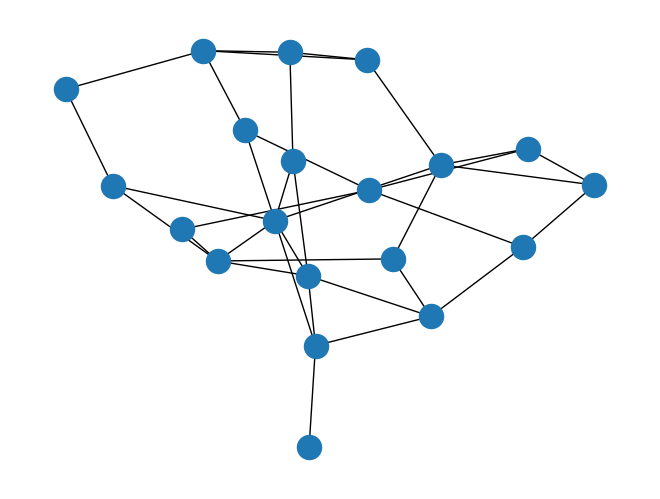

In [10]:
nx.draw(grafo_non_orientato)


## Visualizzare il grafo

**draw(G, pos=None, ax=None, hold=None, kwds)**

* Parameters:	
    *  **G** (graph) – A networkx graph
    *   **pos** (dictionary, optional) – A dictionary with nodes as keys and positions as values. If not specified a **spring layout** positioning will be computed. See networkx.layout for functions that compute node positions.
    *    **ax** (Matplotlib Axes object, optional) – Draw the graph in specified Matplotlib axes.
    *   **hold** (bool, optional) – Set the Matplotlib hold state. If True subsequent draw commands will be added to the current axes.
    * **kwds (optional keywords)** – See networkx.draw_networkx() for a description of optional keywords.

## Visualizzare il grafo: layout

* circular_layout
* fruchterman_reingold_layout
* random_layout
* shell_layout
* spectral_layout

## Visualizzare il grafo

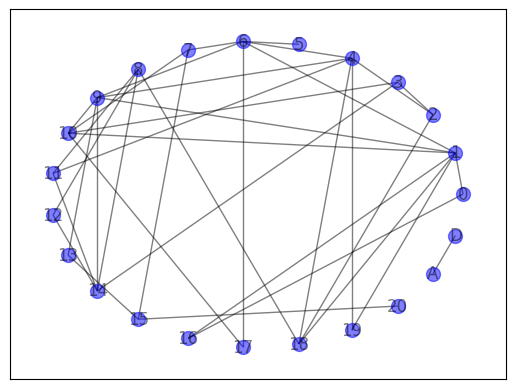

In [12]:
posizione_circular = nx.circular_layout(grafo_non_orientato)
nx.draw_networkx(grafo_non_orientato, pos= posizione_circular, node_size=100, alpha=0.5, node_color='blue')


## Analisi di un dataset reale: FriendHook

* analizzeremo un dataset prelevato da una applicazione di social Networking **FriendHook**
    * social networking app per studenti simile a Facebook
* ogni studente è caratterizzato da un profilo
* dopo essersi registrato e aver creato un profilo, uno studente può inviare richieste di amicizia a altri studenti
* lo studente che riceve la richiesta di amicizia può approvare o rifiutare la richiesta
* quando una richiesta è approvata i due studenti sono ufficilamente **amici** e possono condividere contenuti


## Analisi di un dataset reale: FriendHook

* un DataSet prelevato da un sottoinsieme di **Facebook** 

* i dataset a disposizione

    * **Profile.csv** contiene i profili: per garantire la privacy è presente l'hash di alcuni attributi
    * **Friendships.csv** contiene le relazioni di fiducia stabilite tra utenti
    * **Observations** contengono i suggerimenti di nuove amicizie proposte agli studenti e le risposte degli studenti

* in questo esercizio analizzeremo prevaletemente i primi due dataset, con un obiettivo preciso
    
* **un'osservazione importante!**
    * il grafo è stato ricavato da una rete di amicizie più grande
    * si sono considerati alcuni nodi inziali e se ne sono prese le **ego networks**
      -> ego network sono grafi creati prendendo solamente gli archi(alters) partenti da un nodo scelto (**ego**)
    * la rete comprende la **ego network** di ognuno di questi nodi
        * il nodo,  i suoi amici e le relazioni di amicizia tra i suoi amici
    * le **ego networks** sono state poi combinate
    * il grafo risultatnte contiene un sottoinsieme di una rete sociale


## Analisi di un dataset reale: FriendHook

In [12]:
import pandas as pd

def summarize_table(df):
    n_rows, n_columns = df.shape
    summary = df.describe()
    print(f"The table contains {n_rows} rows and {n_columns} columns.")
    print("Table Summary:\n")
    print(summary.to_string())

df_profile = pd.read_csv('Dataset/Profiles.csv')
print(df_profile.head())
summarize_table(df_profile)


     Profile_ID           Sex Relationship_Status          Dorm         Major  \
0  b8bc075e54b9  6fb336b554b6        9cea719429e9  4bb4df9e464e  827e5c7758c2   
1  49194b3720b6  6fb336b554b6        ac0b88e46e20  a8e6e404d1b3  3c285c164f0c   
2  f0f5962bbc52  6fb336b554b6        ac0b88e46e20  a8e6e404d1b3  f99bb3b6a185   
3  d42f06d92a52  6fb336b554b6        ac0b88e46e20  2a59be064efd  db85f196a0a8   
4  81123b29ee66  e807eb960650        9cea719429e9  a8e6e404d1b3  141d4cdd5aaf   

           Year  
0  c1a648750a4b  
1  8724226d4754  
2  c1a648750a4b  
3  222a76d38f58  
4  222a76d38f58  
The table contains 4039 rows and 6 columns.
Table Summary:

          Profile_ID           Sex Relationship_Status          Dorm         Major          Year
count           4039          4039                3631          4039          4039          4039
unique          4039             2                   3            15            30             4
top     b8bc075e54b9  e807eb960650        ac0b88e46e20

## Analisi di un dataset reale: FriendHook

In [14]:
is_null = df_profile.Relationship_Status.isnull()
print(df_profile[is_null].head())
num_null = df_profile[is_null].shape[0]
print(f"{num_null} profiles are missing the Relationship Status field.")


      Profile_ID           Sex Relationship_Status          Dorm  \
9   1d54d57a01a7  6fb336b554b6                 NaN  a8e6e404d1b3   
30  2631addff82d  6fb336b554b6                 NaN  a8e6e404d1b3   
35  de2965ac31c3  6fb336b554b6                 NaN  a8e6e404d1b3   
41  1e498fd35e79  6fb336b554b6                 NaN  15f366ad6d42   
44  08452885ff12  6fb336b554b6                 NaN  0893eb69bfe9   

           Major          Year  
9   141d4cdd5aaf  e725dc5618e5  
30  141d4cdd5aaf  222a76d38f58  
35  141d4cdd5aaf  8724226d4754  
41  5f952c1d1550  c1a648750a4b  
44  f99bb3b6a185  c1a648750a4b  
408 profiles are missing the Relationship Status field.


## Analisi di un dataset reale: FriendHook

In [15]:
unique_ids = set(df_profile.Relationship_Status.values)
print(unique_ids)


{nan, '9cea719429e9', '188f9a32c360', 'ac0b88e46e20'}


* i valori del **relationship status** sono 3 valori hash + **NaN**
* i tre hash corrispondono allo stato **"Single"**, **"InARelationship**, **"It is Complicated"**

## Analisi di un dataset reale: Mapping dei valori hash

* hash occupa molto spazio di memoria
* idea: mappare ogni hash diverso in un identificatore unico, ma mantenere la relazione dell'id con il rispettivo hash

In [16]:
import numpy as np
category_map = {'9cea719429e9': 0, np.nan: 1, '188f9a32c360': 2, 
                'ac0b88e46e20': 3}
col_to_mapping = {'Relationship_Status': category_map}

nums = [category_map[hash_code] for hash_code in df_profile.Relationship_Status.values]
df_profile['Relationship_Status'] = nums
print(df_profile.Relationship_Status)


0       0
1       3
2       3
3       3
4       0
       ..
4034    3
4035    0
4036    3
4037    3
4038    0
Name: Relationship_Status, Length: 4039, dtype: int64


In [17]:
print(col_to_mapping)


{'Relationship_Status': {'9cea719429e9': 0, nan: 1, '188f9a32c360': 2, 'ac0b88e46e20': 3}}


## Analisi di un dataset reale: Mapping dei valori hash

In [21]:
for column in df_profile.columns:
    if column in col_to_mapping:
        continue 
        
    unique_ids = sorted(set(df_profile[column].values))
    category_map = {id_: i for i, id_ in enumerate(unique_ids)}
    col_to_mapping[column] = category_map
    
    nums = [category_map[hash_code] 
            for hash_code in df_profile[column].values]
    
    df_profile[column] = nums

head = df_profile.tail()
print(head.to_string(index=False))
print(col_to_mapping['Sex'])


 Profile_ID  Sex  Relationship_Status  Dorm  Major  Year
       1874    0                    3    12     11     1
       1514    1                    0    12      2     0
        732    0                    3    12     11     1
       2167    1                    3    12     11     1
       3203    0                    0     4     26     1
{'6fb336b554b6': 0, 'e807eb960650': 1}


## Analisi di un dataset reale: Analisi delle amicizie

In [22]:
df_friends = pd.read_csv('Dataset/Friendships.csv')
print(df_friends.head())
summarize_table(df_friends)


       Friend_A      Friend_B
0  b8bc075e54b9  49194b3720b6
1  b8bc075e54b9  f0f5962bbc52
2  b8bc075e54b9  d42f06d92a52
3  b8bc075e54b9  81123b29ee66
4  b8bc075e54b9  b1b65a546a3e
The table contains 88234 rows and 2 columns.
Table Summary:

            Friend_A      Friend_B
count          88234         88234
unique          3646          4037
top     89581f99fa1e  97ba93d9b169
freq            1043           251


## Analisi di un Dataset reale: Costruzione del grafo

In [23]:
import networkx as nx
G = nx.Graph()
for id1, id2 in df_friends.values:
    node1 = col_to_mapping['Profile_ID'][id1]
    node2 = col_to_mapping['Profile_ID'][id2]
    G.add_edge(node1, node2)
    
nodes = list(G.nodes)
num_nodes = len(nodes)
print(f"The social graph contains {num_nodes} nodes.")
edges = list(G.edges)
num_edges = len(edges)
print(f"The social graph contains {num_edges} edges.")


The social graph contains 4039 nodes.
The social graph contains 88234 edges.


## Plotting the social graph

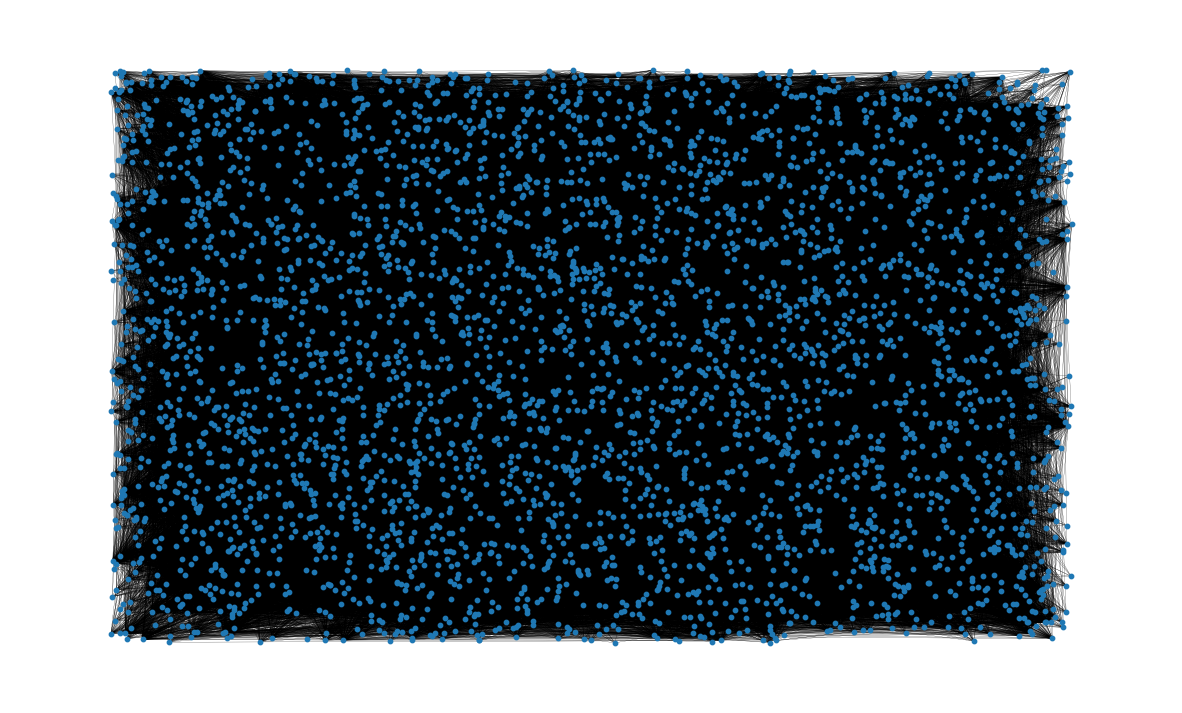

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)


## Plotting the social graph

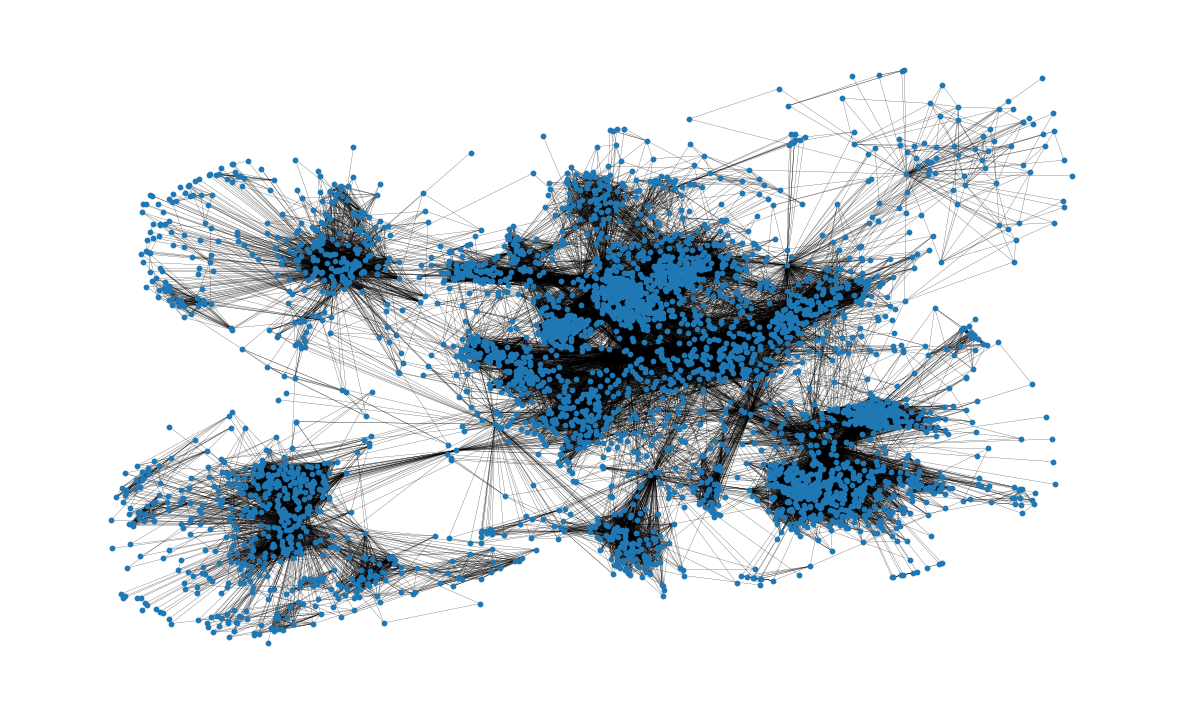

In [25]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)


## Misure di centralità: Degree centrality

* assegna ai nodi un'importanza basata sul numero di archi incidenti nel nodo
* la centralità di un nodo misura la frazione di archi connessi a quel nodo rispetto al numero totale di archi
* nel nostro caso un nodo centrale corrisponde a uno studente che ha molti amici.


In [26]:
degree_centrality = nx.centrality.degree_centrality(G)  
(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True))[:8]


[(2145, 0.258791480931154),
 (343, 0.1961367013372957),
 (3819, 0.18697374938088163),
 (1775, 0.13546310054482416),
 (2899, 0.08593363051015354),
 (3989, 0.07280832095096582),
 (3820, 0.07206537890044576),
 (2368, 0.0629024269440317)]

* **nx.centrality.degree_centrality(G)**
    * restituisce un **dictionary** con una chiave per ogni nodo e valore la corrispettiva **degree centrality**
* la funzione **items()** restituisce gli elementi del dizionario
* la funzione **sorted()**
    * ordina gli elementi del dizionario
    * data una tupla, che corrisponde a un elemento del dizionario, considera l'elemento di indice 1 (il secondo) 
      come chiave per l'ordinamento (nel nostro caso il valore della centralità)
    * **reverse=True**, considera l'ordinamento **decrescente**
* si utilizza l'operatore di slicing su liste per prendere i primi **8 elementi** della lista

## Misure di centralità: Degree centrality

Text(0, 0.5, 'Numero Nodi')

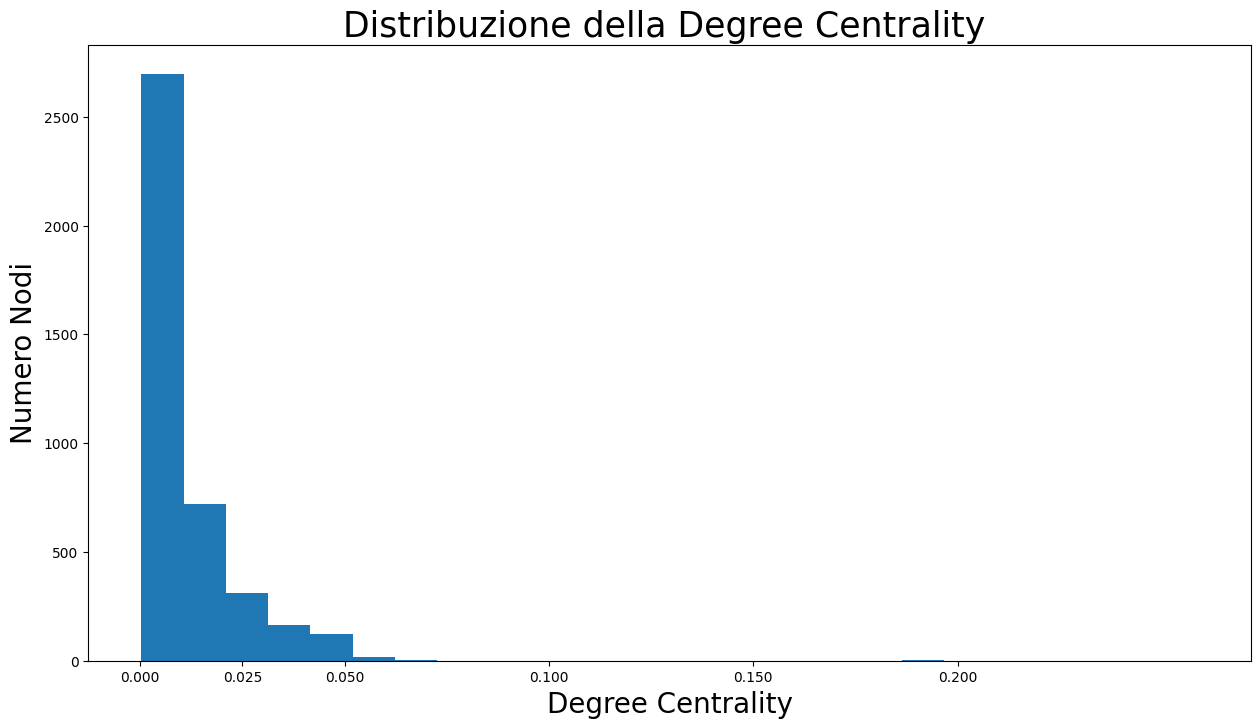

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plt.hist(degree_centrality.values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2]) 
plt.title("Distribuzione della Degree Centrality ", fontdict={"size": 25}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 20})
plt.ylabel("Numero Nodi", fontdict={"size": 20})


## Visualizzazione della centralità dei nodi: degree centrality

(-1.2038685157895088,
 1.1454734280705452,
 -1.06185163885355,
 1.1813933435082435)

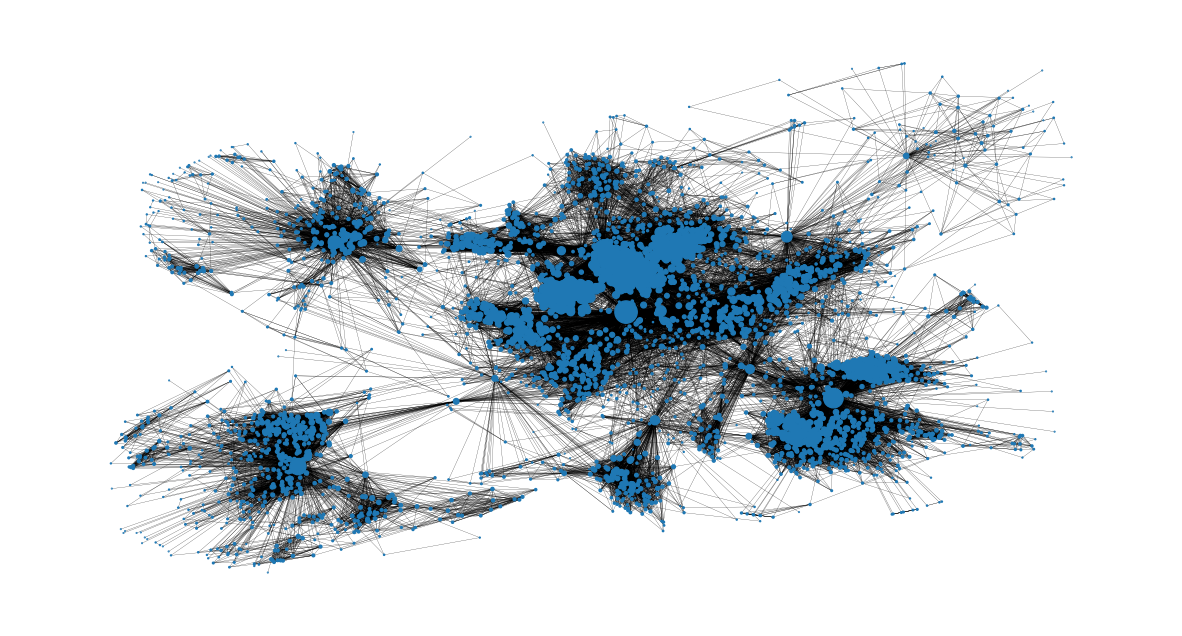

In [28]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
node_size = [v * 1000 for v in degree_centrality.values()]  
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")


* la dimensione di un nodo dipende dalla sua misura di centralità

## Generating a graph 

* edges are generated by a considering a mathematical model

    * find a proper model which is able to generate a network mimicking some real phenomena

* in ‘90: the problem has been deeply studied to model complex networks like **Internet**, **WWW** and **P2P**

* proposed Models:

    **Random Graphs**: a simple model, but it is not able to describe some interesting properties, for instance highly clustered networks   
    **Watts-Strogatz**: small worlds + clustering    
    **Kleinberg**: small worlds + finding short paths    
    **Barabasi-Albert**: scale free networks

## Random Graph:  (Erdos, Renyi, years'50) 

* a basic model for the analysis of complex networks
    * consider a set of nodes
    * start with a collection of **n** disconnected nodes.
    * create an edge between each pair of nodes with a probability **p**, independently of every other edge.
    * each connection is independent from the others (Binomial or Poisson Distribution).

* is this a good model for complex networks?
    * it seemed  till 20 years ago
    * but technological evolution has
        * enabled an experimental analysis of the structure of the real complex networks with millions of nodes
        * shown that the random model does not completely reflect the structure of many complex networks
        
* we will start from this model 
    * a good basis for studying other models!

## Random Graph:  (Erdos, Renyi, years'50) 

* **Erdos-Renyi Model**: a undirected  graph $G_{n,p} (ER(n,p))$, two parameters
    * **n** number of nodes
    * **p** probability

* construction procedure:  
    * for each pair of nodes $(u,v), u \neq v$ among the  $\binom{n}{2}$ = $\frac{n(n-1)}{2}$ possible pairs, “flip” a “biased” coin that comes up “heads” with probability **p** 
        * if it flips “heads”, then add the edge to the network
        * if it flips “tails”, do not add the edge to the network
    * this is equivalent to add the considered edge to the graph with probability  p,

* independent choices: the presence/absence of an edge is independent from that of other ones 

* a simple graph: no self cycle,  at most one edge between two different vertices

## Random Graph:  (Erdos, Renyi, years'50) 

<center>
<img src="Figures/ER1.jpg" scale=0.2/>
</center>

* example $n=5$, $p=0.6$
* number of possible edges $n(n-1)/2$ = $5 \times 4/2 = 10$
* ten flips of a coin that comes up heads $40\%$, tails $60\%$

<center>
<img src="Figures/ER2.jpg" scale=0.2/>
</center>

* average node degree = $2.4 = (n-1) \times p = 4 \times 0.6 $


## Erdos, Renyi graph in NetworkX, n=20, p=0

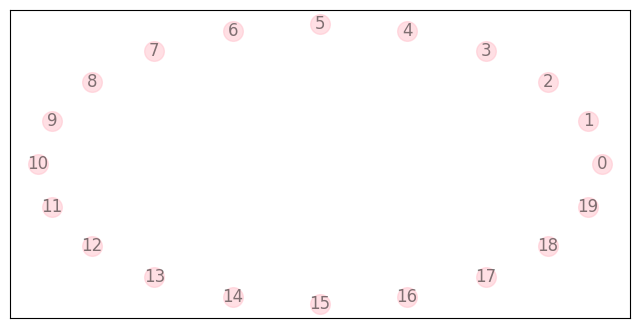

In [29]:
import random
import matplotlib.pyplot as plt
from IPython.display import Image

# Generate the graph
n = 20
p = 0
G_erdos = nx.erdos_renyi_graph(n,p, seed =100)

# Plot the graph
plt.figure(figsize=(8,4))
posizione_circular = nx.circular_layout(G_erdos)
nx.draw_networkx(G_erdos, pos= posizione_circular, node_size=200, alpha=0.5, node_color='pink')



## Erdos, Renyi graph in NetworkX, n=50,  p=0.2

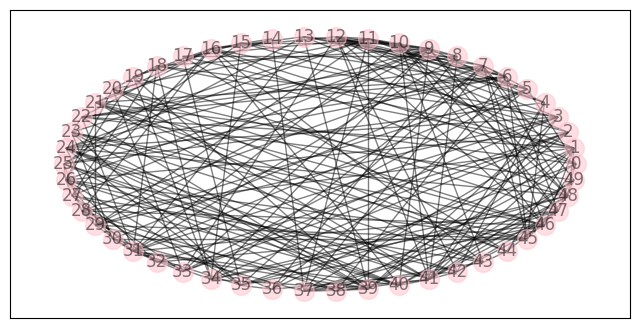

In [30]:
g1 = nx.erdos_renyi_graph(50, 0.2)
plt.figure(figsize=(8,4))


posizione_circular = nx.circular_layout(g1)
nx.draw_networkx(g1, pos= posizione_circular, node_size=200, alpha=0.5, node_color='pink')


## Erdos, Renyi graph in NetworkX, n=50,  p=0.2

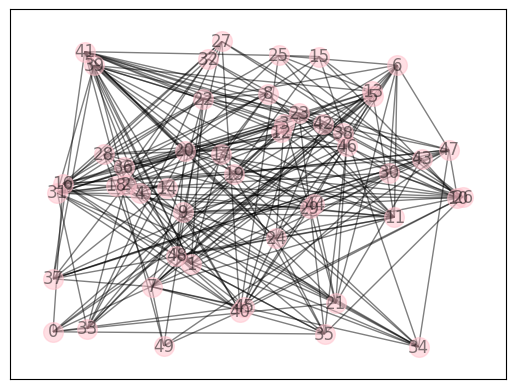

In [31]:
r_layout = nx.random_layout(g1)
nx.draw_networkx(g1, pos= r_layout, node_size=200, alpha=0.5, node_color='pink')


## Erdos, Renyi graph in NetworkX, n= 50, p=0.2

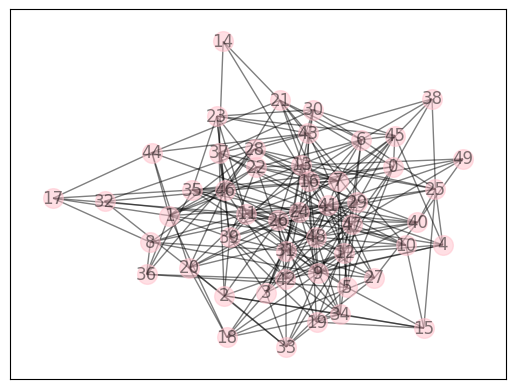

In [32]:
f_layout = nx.fruchterman_reingold_layout(g1)
nx.draw_networkx(g1, pos= f_layout  , node_size=200, alpha=0.5, node_color='pink')


## Erdos, Renyi graph in NetworkX, n=30, p=1

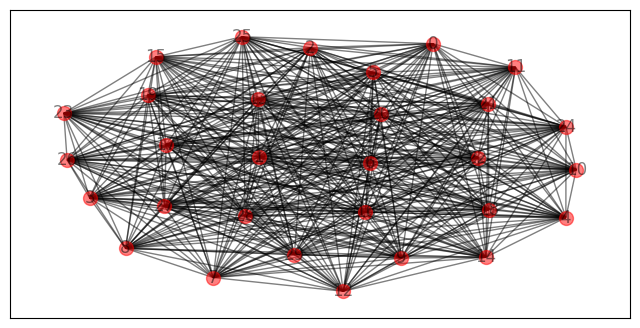

In [33]:
# Generate the graph
n =30
p = 1
G_erdos = nx.erdos_renyi_graph(n,p, seed =100)

# Plot the graph
plt.figure(figsize=(8,4))

nx.draw_networkx(G_erdos, node_size=100, alpha=0.5, node_color='red')


## Erdos, Renyi graph in NetworkX, n=100, p=0.15

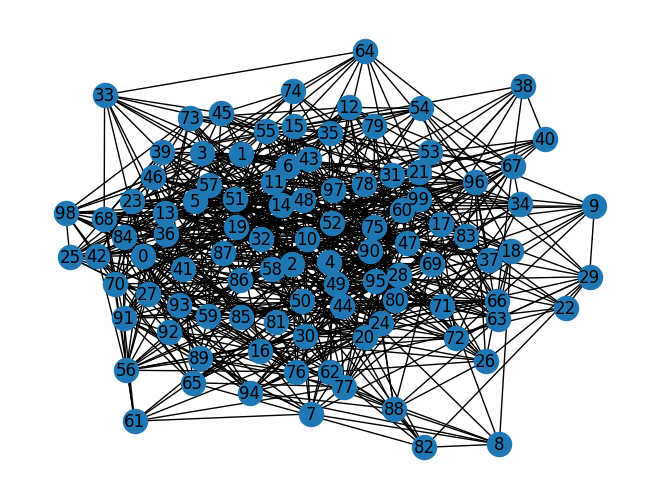

In [34]:
er = nx.erdos_renyi_graph(100, 0.15) #100 nodes connected with probability 0.15
nx.draw(er, with_labels=True)


## Node Degree distribution

* Degree of a node  **v** of an **undirected graph**, **$\delta(v)$**: number of edges incident in **v**. 
    * a cycle is counted twice. 
    * in-degree, out-degree for oriented graphs

* the analysis of the distribution of node degrees returns information on the network structure, for instance:
    *  if most vertexes have the same degree (uniform distribution), all the vertexes have similar roles in the network
    * if only some nodes with a high degree, these are “hubs” and the network may be partitioned if they are removed

* tools for the analysis of the node degree:
    * histograms: shows the number of vertexes with a given degree
    * degree sequences
    * degree correlation

## Node Degree distribution

In [35]:
vk = dict(er.degree())
vl = list(vk.values())
vn = list(vk.keys())
print('Nodes', vn)
print('Degree', vl)


Nodes [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Degree [15, 20, 19, 13, 19, 13, 14, 13, 8, 10, 24, 12, 15, 19, 19, 14, 14, 14, 15, 20, 23, 14, 7, 18, 19, 15, 14, 16, 17, 12, 15, 17, 12, 11, 10, 13, 16, 11, 8, 15, 8, 20, 13, 13, 13, 11, 17, 20, 17, 21, 15, 14, 18, 11, 12, 14, 15, 15, 21, 12, 14, 8, 12, 16, 11, 13, 14, 15, 18, 19, 15, 16, 13, 14, 11, 17, 16, 16, 12, 8, 16, 15, 8, 15, 17, 17, 18, 16, 13, 14, 17, 20, 13, 12, 15, 18, 16, 16, 15, 16]


* **degree** è una proprietà dell'oggetto Graph **Python**
* è un tipo **DegreeView**, che può essere trasformato in un **dizionario**
* stampo chiavi (numero del nodo) e valori del dizionario

## Node Degree mean


In [36]:
import numpy as np
md = np.mean(vl)
print('Mean degree: ', md)


Mean degree:  14.78


## Node degree Distribution

In [37]:
def degree_distribution(G):
    vk = dict(er.degree())
    vk = list(vk.values()) # we get only the degree values
    maxk = np.max(vk)
    mink = np.min(vk)
    print(maxk)
    print(mink)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk


In [38]:
ks, Pk = degree_distribution(er)
print (ks)
print (Pk)


24
7
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
[0.   0.   0.   0.   0.   0.   0.   0.01 0.06 0.   0.02 0.06 0.08 0.11
 0.12 0.15 0.11 0.08 0.05 0.06 0.05 0.02 0.   0.01 0.01]


## Plotting the distribution

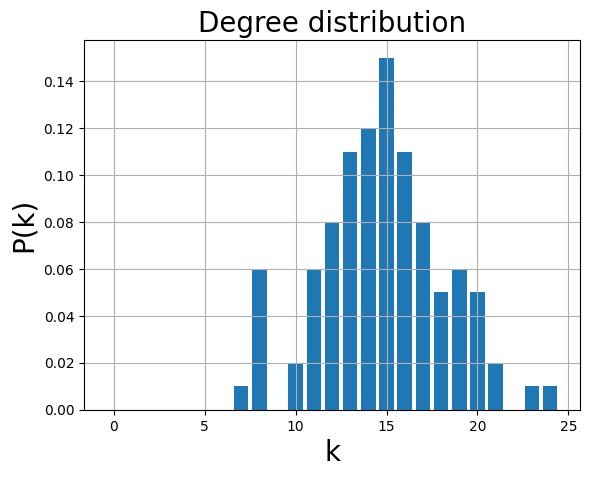

In [39]:
plt.figure()
# plt.loglog(ks,Pk,'bo',basex=10,basey=10)
plt.bar(ks,Pk)
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.grid(True)
# plt.savefig('degree_dist.eps') #save the figure into a file
plt.show(True)


## Erdos, Renyi: distribuzione dei gradi dei nodi

* let us study the node degree distribution from a theoretical point of view
* compute the probability that the degree of vertex **u** is  equal to **k**, $\forall k:  0\leq k \leq n-1$
    * a node has degree zero if all coins flips involving n are “tails”
    * a node has degree (n-1) if all coins flips involving n are “heads" 
    * for a node to have degree k,  the n-1 flips must have resulted in k “heads” and  n-1-k “tails”
    * since the probability of heads is “p” the probability of “tail” is 1-p, the outcome of k “heads” and n-1-k "tails" occurs       with probability
    
    $p^k \times (1-p)^{n-1-k}$

    * but we must choose among the other n-1 vertexes, k vertexes to connect to u and there are             
    
    $\binom{n-1}{k}$
    
    ways to choose k different vertexes out of n-1 vertexes 

* the probability that the degree of a node is $k$, is therefore

   $\binom{n-1}{k} \times  p^k \times (1-p)^{n-1-k}$

* therefore,the degree distribution in a Erdos Renyi graph may be represented by a **binomila distribution**
* the expected value for a **binomial distribution** is $ p \times (n-1)$
* average degree of the nodes of our Erdos, Renyi graph is 
    * $p=0,15, n=100$  = $0,15 \times 100 = 15$


## Graph Diameter

* distance between the nodes d and u of the graph = **minimal path length between u and v.**
* diameter of a graph is the **longest of the distances** between all pairs of nodes. it is the longest shortest path

<center>
<img src="Figures/Diameters.jpg" scale=0.2/>
</center>

* in a connected network with n nodes, the diameter is in the range 1 (completely connected) to n-1 (linear chain)

* in a random graph: for a given n, vary the parameter p from 0 to 1

    * at some critical value of p the diameter becomes finite (the network becomes connected) and continues 
      to decrease becoming  1 when p=1 


## Erdos, Renyi: Graph Diameter

In [40]:
d = nx.diameter(er)
print('Network diameter:', d)


Network diameter: 3


In [41]:
if nx.is_connected(er) == True:
    l = nx.average_shortest_path_length(er)
    print("Average shortest path length:", "%3.4f"%l)
    

Average shortest path length: 1.9408


## Erdos, Renyi: Graph Diameter

* let us study the diameter from a theoretical point of view

* a simplification: 
    * a tree structured network of nodes with identical degree k equal to the average degree $p \times (n-1)$

* starting from a given node (that circled in red), how many nodes can be reached after L steps?

    * after $1$ step reach $k$ nodes
    * after $2$ steps reach $k\times(k-1)$ nodes
    * after $3$ steps reach $k\times(k-1)\times(k-2)$ nodes
    * and so on....
    


<center>
<img src="Figures/DiameterProof.jpg" scale=0.2/>
</center>

## Erdos, Renyi: Graph Diameter

* the number of nodes reached  
    * grows exponentially step by step
    * after L steps, can be approximated as $K^L$

* how many steps to reach  all $n-1$ nodes, starting from the central node?
    * $K^L = n-1$ and $L$ is an approximation of the diameter
    * $log K^L$ = $log n$  $\Rightarrow$ $L  \times log K$ = $log n$ $\Rightarrow$ $L = log n / log  K$

* the “separation degree” of a random graph logarithmically grows with respect to the number of nodes:
    * low diameter
    * the model captures the “low diameter” property observed in many real networks
    * the ER model is a “good predictor” of diameter and average path lengths of many real networks